Downloading Dataset

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
 from google.colab import files
 files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rohitnegi1","key":"000714214a5c846bd5d29447fccd6c1a"}'}

In [3]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d sobhanmoosavi/us-accidents


 99% 267M/269M [00:01<00:00, 165MB/s]
100% 269M/269M [00:01<00:00, 143MB/s]


Extracting zip file





In [7]:
from zipfile import ZipFile
file="/content/us-accidents.zip"
with ZipFile(file,'r')as zip:
  zip.printdir()
  zip.extractall()

File Name                                             Modified             Size
US_Accidents_Dec21_updated.csv                 2022-03-12 07:43:18   1154730978


In [8]:
file_name="/content/US_Accidents_Dec21_updated.csv"


Data Cleaning with numpy and pandas
1. Loading the files
2. checking the for missing values
3. fixing the data

In [9]:
import numpy as np 
import pandas as pd

In [10]:
df=pd.read_csv(file_name)

In [11]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [13]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [14]:
df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.089207,0.114063,0.089209,0.114064,0.092140,-0.000689,-0.045335,-0.097459,0.037802,...,0.008141,0.045928,-0.002359,-0.001747,-0.000773,-0.018017,-0.002536,-0.003009,-0.012798,NaN
Start_Lat,0.089207,1.000000,-0.154965,0.999995,-0.154962,0.071588,0.101281,-0.475065,-0.505567,0.005876,...,0.007851,0.043628,-0.017348,0.003184,-0.003366,-0.107697,0.010817,-0.003164,-0.058208,NaN
Start_Lng,0.114063,-0.154965,1.000000,-0.154956,0.999999,0.039861,-0.170566,0.032159,0.010849,0.170909,...,0.018110,-0.017202,0.006220,-0.015450,0.000450,0.038533,-0.040265,-0.007750,0.059568,NaN
End_Lat,0.089209,0.999995,-0.154956,1.000000,-0.154953,0.071593,0.101270,-0.475058,-0.505561,0.005869,...,0.007840,0.043621,-0.017347,0.003184,-0.003366,-0.107696,0.010827,-0.003163,-0.058210,NaN
End_Lng,0.114064,-0.154962,0.999999,-0.154953,1.000000,0.039830,-0.170563,0.032163,0.010852,0.170904,...,0.018110,-0.017199,0.006220,-0.015449,0.000450,0.038533,-0.040264,-0.007750,0.059566,NaN
Distance(mi),0.092140,0.071588,0.039861,0.071593,0.039830,1.000000,0.067331,-0.051212,-0.060094,0.026860,...,-0.006655,0.022442,-0.010184,-0.021462,-0.002491,-0.052826,-0.027108,-0.007322,-0.105722,NaN
Number,-0.000689,0.101281,-0.170566,0.101270,-0.170563,0.067331,1.000000,-0.051146,-0.049400,0.015825,...,-0.003792,-0.010801,-0.005052,-0.013668,-0.001360,-0.028485,-0.003688,-0.005075,-0.058870,NaN
Temperature(F),-0.045335,-0.475065,0.032159,-0.475058,0.032163,-0.051212,-0.051146,1.000000,0.993857,-0.366527,...,-0.005524,-0.020358,0.011610,0.003108,0.002122,0.061248,0.000021,0.005672,0.047657,NaN
Wind_Chill(F),-0.097459,-0.505567,0.010849,-0.505561,0.010852,-0.060094,-0.049400,0.993857,1.000000,-0.346028,...,-0.007584,-0.048784,0.012066,0.005062,0.002466,0.069379,0.005424,0.007140,0.048321,NaN
Humidity(%),0.037802,0.005876,0.170909,0.005869,0.170904,0.026860,0.015825,-0.366527,-0.346028,1.000000,...,0.000063,0.006394,-0.007099,-0.000309,0.000904,-0.000095,-0.015631,-0.005727,-0.034133,NaN


In [15]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [16]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df) #number of null values

In [17]:
missing_percentage[missing_percentage !=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

In [32]:
df_city=df.City.value_counts()
import matplotlib.pyplot as plt
import seaborn as sns


0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

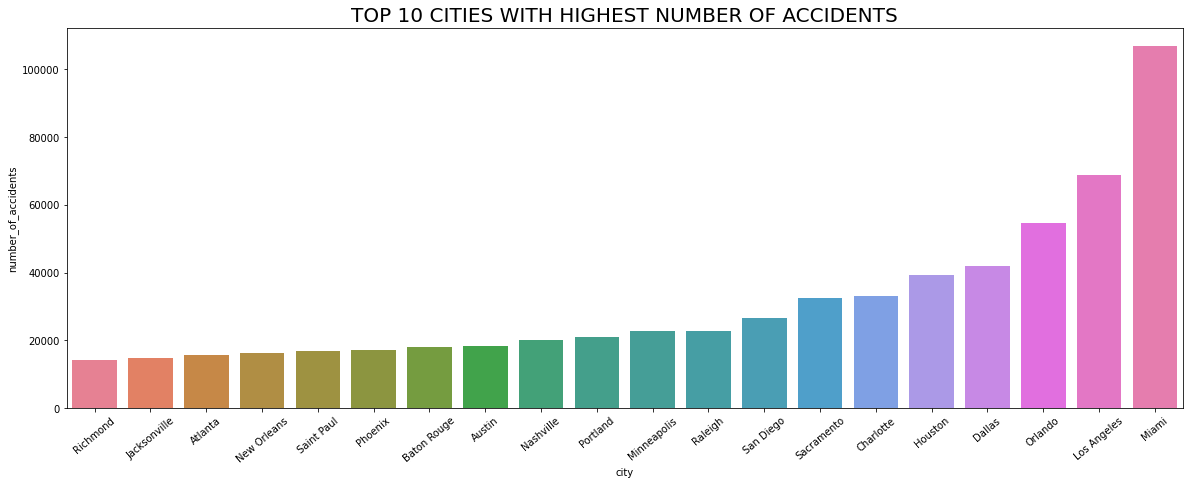

In [49]:
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

plt.figure(figsize=(20,7))
sns.barplot(x="city",y="number_of_accidents",data=top_cities , palette="husl")
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()